In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covidDF = pd.read_csv("covid.csv")
breastDF = pd.read_csv("breast.csv")
#Type of intervention, Eligibility, Results presented

In [2]:
#Analysis related to interventions. Start with comparisons bewtween the two datasets. 
#First, let's get all of the columns 
colList = list(breastDF.columns)
colList


['NCT Number',
 'Status',
 'Conditions',
 'Interventions',
 'Sponsor',
 'Collaborators',
 'Sex',
 'Age',
 'Phases',
 'Enrollment',
 'Funder Type',
 'Study Type',
 'Start Date',
 'Completion Date']

In [3]:
#Create a dataframe for the breast cancer dataset
breastInterventions = breastDF.copy()
#Keep only 'NCT Number', 'Status', 'Conditions', 'Interventions' columns
breastInterventions = breastInterventions[['NCT Number', 'Status', 'Conditions', 'Interventions']]
breastInterventions.head()
type(breastInterventions) 

pandas.core.frame.DataFrame

In [4]:
#Get the unique values of the 'Interventions' column
breastInterventions['Interventions'].unique()
#The intentions are delimited by '|'. For each trial, split the interventions and create a and replace the one string with a list of the delimted values. I will also create a new column that counts the number of interventions for each trial.
breastInterventions['Interventions'] = breastInterventions['Interventions'].str.split('|')
breastInterventions['Interventions Count'] = breastInterventions['Interventions'].apply(lambda x: len(x))
breastInterventions.head()


,NCT Number,Status,Conditions,Interventions,Interventions Count
0,NCT04461977,UNKNOWN,Peripheral Neuropathy Due to Chemotherapy,"[OTHER: True acupuncture, OTHER: Sham acupunct...",2
1,NCT05422794,RECRUITING,Anatomic Stage III Breast Cancer AJCC v8|Anato...,"[DRUG: BET Bromodomain Inhibitor ZEN-3694, PRO...",7
2,NCT05122494,RECRUITING,Breast Cancer,"[DRUG: Hemay022+AI, DRUG: Lapatinib+Capecitabine]",2
3,NCT05000294,SUSPENDED,Bile Duct Cancer|Gall Bladder Cancer|Breast Ca...,"[DRUG: Atezolizumab, DRUG: Tivozanib]",2
4,NCT05134194,UNKNOWN,Triple Negative Breast Cancer,[DRUG: Camrelizumabã€Capecitabine/eribulin/ge...,2


In [5]:
#Create a dataframe where the first column is the number of interventions and the second column is the number of trials with that number of interventions
breastInterventionsCount = breastInterventions['Interventions Count'].value_counts().reset_index()
breastInterventionsCount.columns = ['Interventions Count', 'Number of Trials']
breastInterventionsCount = breastInterventionsCount.sort_values(by = 'Interventions Count')
breastInterventionsCount


,Interventions Count,Number of Trials
0,1,1290
1,2,908
2,3,354
3,4,177
4,5,102
5,6,63
6,7,34
7,8,19
8,9,12
9,10,10


In [6]:
#Recreate that, but if there are more than 13 interventions, then put them in the 13+ category
breastInterventions['Interventions Count'] = breastInterventions['Interventions Count'].apply(lambda x: x if x <= 13 else 13)
breastInterventionsCount = breastInterventions['Interventions Count'].value_counts().reset_index()
breastInterventionsCount.columns = ['Interventions Count', 'Number of Trials']
breastInterventionsCount = breastInterventionsCount.sort_values(by = 'Interventions Count')
breastInterventionsCount

,Interventions Count,Number of Trials
0,1,1290
1,2,908
2,3,354
3,4,177
4,5,102
5,6,63
6,7,34
7,8,19
9,9,12
10,10,10


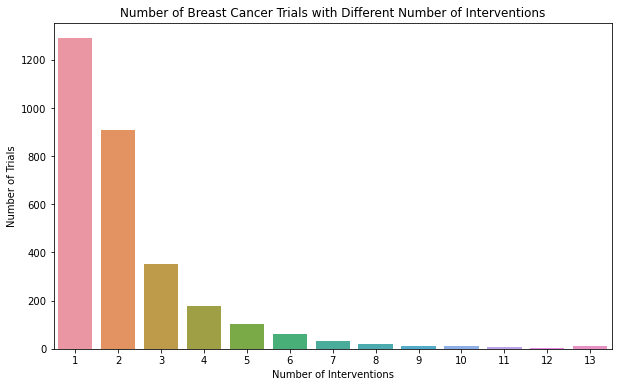

In [7]:
#Display the number of trials with each number of interventions on a bar plot
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Interventions Count', y = 'Number of Trials', data = breastInterventionsCount)
plt.title('Number of Breast Cancer Trials with Different Number of Interventions')
plt.xlabel('Number of Interventions')
plt.ylabel('Number of Trials')
plt.show()




In [8]:
#Let's recreate that for the covid dataset
covidInterventions = covidDF.copy()
covidInterventions = covidInterventions[['NCT Number', 'Status', 'Conditions', 'Interventions']]
covidInterventions.head()


,NCT Number,Status,Conditions,Interventions
0,NCT04446377,COMPLETED,COVID-19 Disease,DRUG: Apilimod Dimesylate Capsule|OTHER: Placebo
1,NCT05508477,RECRUITING,COVID-19 Pandemic|COVID-19 Vaccines,BIOLOGICAL: Vaksin Merah Putih - UA SARS-CoV-2...
2,NCT04472494,TERMINATED,COVID-19|SARS-CoV-2,BIOLOGICAL: Abatacept|OTHER: Placebo
3,NCT04720794,COMPLETED,Covid19|SARS (Severe Acute Respiratory Syndrom...,DEVICE: Lucira COVID-19 All-In-One test kit
4,NCT04598594,COMPLETED,Covid19|SARS-Associated Coronavirus as Cause o...,"DRUG: Patch, Nicotine|DRUG: Patch, Placebo"


In [9]:
covidInterventions
#Get the type of the 'Interventions' column
type(covidInterventions['Interventions'][0])
#The intentions are delimited by '|'. For each trial, split the interventions and create a and replace the one string with a list of the delimted values. I will also create a new column that counts the number of interventions for each trial.
covidInterventions['Interventions'] = covidInterventions['Interventions'].str.split('|')
covidInterventions['Interventions Count'] = covidInterventions['Interventions'].apply(lambda x: len(x))
covidInterventions

,NCT Number,Status,Conditions,Interventions,Interventions Count
0,NCT04446377,COMPLETED,COVID-19 Disease,"[DRUG: Apilimod Dimesylate Capsule, OTHER: Pla...",2
1,NCT05508477,RECRUITING,COVID-19 Pandemic|COVID-19 Vaccines,[BIOLOGICAL: Vaksin Merah Putih - UA SARS-CoV-...,2
2,NCT04472494,TERMINATED,COVID-19|SARS-CoV-2,"[BIOLOGICAL: Abatacept, OTHER: Placebo]",2
3,NCT04720794,COMPLETED,Covid19|SARS (Severe Acute Respiratory Syndrom...,[DEVICE: Lucira COVID-19 All-In-One test kit],1
4,NCT04598594,COMPLETED,Covid19|SARS-Associated Coronavirus as Cause o...,"[DRUG: Patch, Nicotine, DRUG: Patch, Placebo]",2
...,...,...,...,...,...
2617,NCT04447235,TERMINATED,Cancer|COVID|Coronavirus Infection,"[DRUG: Placebo, DRUG: Ivermectin, DRUG: Losartan]",3
2618,NCT04555096,TERMINATED,Covid19|SARS-CoV-2 Infection,"[DRUG: GC4419, DRUG: Placebo]",2
2619,NCT04672395,COMPLETED,COVID-19,[BIOLOGICAL: CpG 1018/Alum-adjuvanted SCB-2019...,4
2620,NCT05162495,UNKNOWN,COVID-19,[DEVICE: BioStation T101 and TeraTube],1


In [10]:
#Create a dataframe where the first column is the number of interventions and the second column is the number of trials with that number of interventions
covidInterventionsCount = covidInterventions['Interventions Count'].value_counts().reset_index()
covidInterventionsCount.columns = ['Interventions Count', 'Number of Trials']
covidInterventionsCount = covidInterventionsCount.sort_values(by = 'Interventions Count')
covidInterventionsCount


,Interventions Count,Number of Trials
1,1,1025
0,2,1084
2,3,253
3,4,137
4,5,51
5,6,24
6,7,18
7,8,8
8,9,7
14,10,1


In [11]:
#Recreate that, but if there are more than 13 interventions, then put them in the 13+ category
covidInterventions['Interventions Count'] = covidInterventions['Interventions Count'].apply(lambda x: x if x <= 13 else 13)
covidInterventionsCount = covidInterventions['Interventions Count'].value_counts().reset_index()
covidInterventionsCount.columns = ['Interventions Count', 'Number of Trials']
covidInterventionsCount = covidInterventionsCount.sort_values(by = 'Interventions Count')
covidInterventionsCount


,Interventions Count,Number of Trials
1,1,1025
0,2,1084
2,3,253
3,4,137
4,5,51
5,6,24
6,7,18
7,8,8
8,9,7
12,10,1


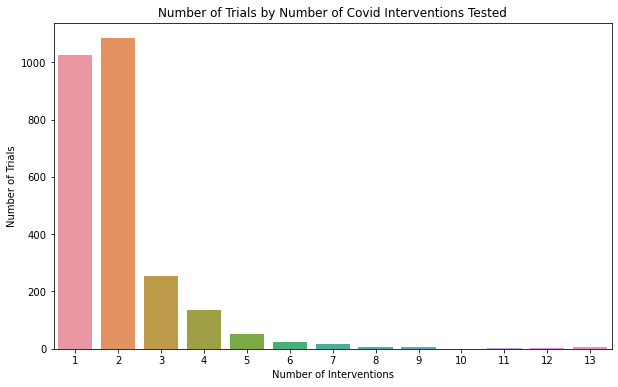

In [12]:
#Display the number of trials with each number of interventions on a bar plot. Display the count of each bar on the plot
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Interventions Count', y = 'Number of Trials', data = covidInterventionsCount)
plt.title('Number of Trials by Number of Covid Interventions Tested')
plt.xlabel('Number of Interventions')
plt.ylabel('Number of Trials')
plt.show()



In [13]:
#Join the two dataframes together and display on a bar graph, with the number of studies for breast cancer in pink, and covid in blue
breastInterventionsCount['Condition'] = 'Breast Cancer'
covidInterventionsCount['Condition'] = 'Covid'
interventionsCount = pd.concat([breastInterventionsCount, covidInterventionsCount])
interventionsCount

,Interventions Count,Number of Trials,Condition
0,1,1290,Breast Cancer
1,2,908,Breast Cancer
2,3,354,Breast Cancer
3,4,177,Breast Cancer
4,5,102,Breast Cancer
5,6,63,Breast Cancer
6,7,34,Breast Cancer
7,8,19,Breast Cancer
9,9,12,Breast Cancer
10,10,10,Breast Cancer


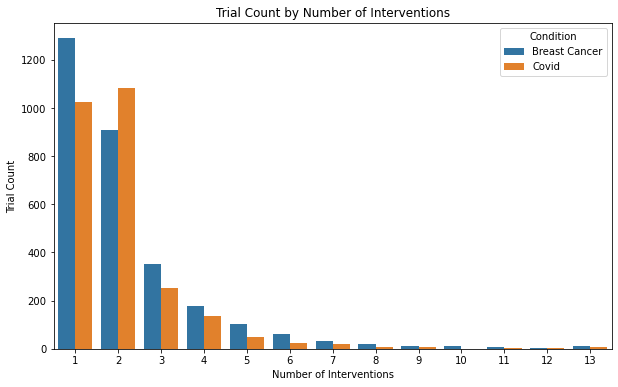

In [14]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Interventions Count', y = 'Number of Trials', data = interventionsCount, hue = 'Condition')
plt.title('Trial Count by Number of Interventions')
plt.xlabel('Number of Interventions')
plt.ylabel('Trial Count')
plt.show()


In [65]:
#Now let's do some analysis about the type of the intervention that's being used. Let's see what the most common interventions are for each dataset
#From breastInterventions, create a dictionary of all interventions and their counts
breastInterventionsDict = {}
for interventions in breastInterventions['Interventions']:
    for intervention in interventions:
        if intervention in breastInterventionsDict:
            breastInterventionsDict[intervention] += 1
        else:
            breastInterventionsDict[intervention] = 1
breastInterventionsDict = pd.DataFrame(list(breastInterventionsDict.items()), columns = ['Intervention', 'Count'])
breastInterventionsDict = breastInterventionsDict.sort_values(by = 'Count', ascending = False)  



In [68]:
#Split intervention into intervention type (before the space) and intervention name (after the space)
breastInterventionsDict['Intervention Type'] = breastInterventionsDict['Intervention'].apply(lambda x: x.split(' ')[0])
breastInterventionsDict['Intervention Name'] = breastInterventionsDict['Intervention'].apply(lambda x: x.split(' ')[1])
breastInterventionsDict[breastInterventionsDict['Intervention Type'] == 'OTHER:'].head(10)



,Intervention,Count,Intervention Type,Intervention Name
62,OTHER: Questionnaire Administration,71,OTHER:,Questionnaire
134,OTHER: Quality-of-Life Assessment,44,OTHER:,Quality-of-Life
305,OTHER: Best Practice,18,OTHER:,Best
306,OTHER: Survey Administration,17,OTHER:,Survey
356,OTHER: Placebo,17,OTHER:,Placebo
220,OTHER: Educational Intervention,13,OTHER:,Educational
168,OTHER: Medical Device Usage and Evaluation,8,OTHER:,Medical
61,OTHER: Interview,7,OTHER:,Interview
1577,OTHER: Exercise Intervention,6,OTHER:,Exercise
2207,OTHER: Control group,6,OTHER:,Control


In [ ]:
#For each Intervention type, sum the count columns for each intervention type
breastInterventionsDict = breastInterventionsDict.groupby('Intervention Type').sum().reset_index()
breastInterventionsDict = breastInterventionsDict.sort_values(by = 'Count', ascending = False)
breastInterventionsDict

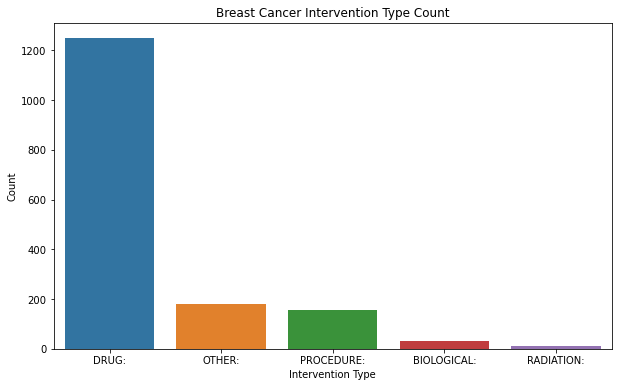

In [57]:
#Display the count of each intervention type on a bar plot
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Intervention Type', y = 'Count', data = breastInterventionsDict)
plt.title('Breast Cancer Intervention Type Count')
plt.xlabel('Intervention Type')
plt.ylabel('Count')
plt.show()


In [60]:
breastInterventionsDictOther = breastInterventionsDict[breastInterventionsDict['Intervention Type'] == 'OTHER:']
breastInterventionsDictOther = breastInterventionsDictOther.sort_values(by = 'Count', ascending = False)
breastInterventionsDictOther.head(10)



,Intervention Type,Count
2,OTHER:,180


In [17]:
#Now that we have a more manageable list, let's plot this data in 3 ways to see which is the nicest. Let's plot the 20 most common interventions when the type is 'Drug'
#Create a dataframe that only contains the interventions where the type is 'Drug'
breastInterventionsDictDrug = breastInterventionsDict[breastInterventionsDict['Intervention Type'] == 'DRUG:']
breastInterventionsDictDrug.head(20)



,Intervention,Count,Intervention Type,Intervention Name,Target
38,DRUG: Fulvestrant,81,DRUG:,Fulvestrant,Breast Cancer
29,DRUG: Paclitaxel,71,DRUG:,Paclitaxel,Breast Cancer
28,DRUG: Cyclophosphamide,68,DRUG:,Cyclophosphamide,Breast Cancer
111,DRUG: Trastuzumab,63,DRUG:,Trastuzumab,Breast Cancer
71,DRUG: Carboplatin,59,DRUG:,Carboplatin,Breast Cancer
75,DRUG: Pembrolizumab,59,DRUG:,Pembrolizumab,Breast Cancer
242,DRUG: Abemaciclib,53,DRUG:,Abemaciclib,Breast Cancer
21,DRUG: Capecitabine,51,DRUG:,Capecitabine,Breast Cancer
54,DRUG: Placebo,46,DRUG:,Placebo,Breast Cancer
113,DRUG: Letrozole,45,DRUG:,Letrozole,Breast Cancer


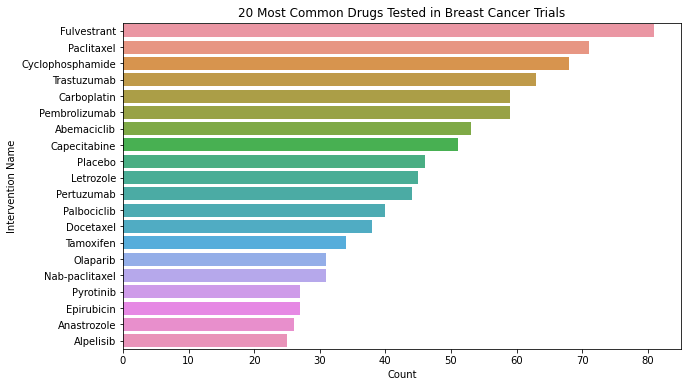

In [33]:
#First, a bar plot
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Count', y = 'Intervention Name', data = breastInterventionsDictDrug.head(20))  
plt.title('20 Most Common Drugs Tested in Breast Cancer Trials')
plt.xlabel('Count')
plt.ylabel('Intervention Name')
plt.show()

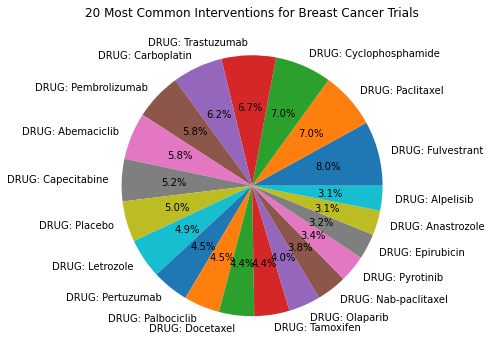

In [19]:
#The next plot will be a pie chart

plt.figure(figsize = (10, 6), facecolor='white')
plt.pie(breastInterventionsDict['Count'].head(20), labels = breastInterventionsDictDrug['Intervention'].head(20), autopct='%1.1f%%')
plt.title('20 Most Common Interventions for Breast Cancer Trials')
plt.show()


In [20]:
covidInterventions

,NCT Number,Status,Conditions,Interventions,Interventions Count
0,NCT04446377,COMPLETED,COVID-19 Disease,"[DRUG: Apilimod Dimesylate Capsule, OTHER: Pla...",2
1,NCT05508477,RECRUITING,COVID-19 Pandemic|COVID-19 Vaccines,[BIOLOGICAL: Vaksin Merah Putih - UA SARS-CoV-...,2
2,NCT04472494,TERMINATED,COVID-19|SARS-CoV-2,"[BIOLOGICAL: Abatacept, OTHER: Placebo]",2
3,NCT04720794,COMPLETED,Covid19|SARS (Severe Acute Respiratory Syndrom...,[DEVICE: Lucira COVID-19 All-In-One test kit],1
4,NCT04598594,COMPLETED,Covid19|SARS-Associated Coronavirus as Cause o...,"[DRUG: Patch, Nicotine, DRUG: Patch, Placebo]",2
...,...,...,...,...,...
2617,NCT04447235,TERMINATED,Cancer|COVID|Coronavirus Infection,"[DRUG: Placebo, DRUG: Ivermectin, DRUG: Losartan]",3
2618,NCT04555096,TERMINATED,Covid19|SARS-CoV-2 Infection,"[DRUG: GC4419, DRUG: Placebo]",2
2619,NCT04672395,COMPLETED,COVID-19,[BIOLOGICAL: CpG 1018/Alum-adjuvanted SCB-2019...,4
2620,NCT05162495,UNKNOWN,COVID-19,[DEVICE: BioStation T101 and TeraTube],1


In [21]:
#From covidInterventions, create a dictionary of all interventions and their counts
covidInterventionsDict = {}
for interventions in covidInterventions['Interventions']:
    for intervention in interventions:
        if intervention in covidInterventionsDict:
            covidInterventionsDict[intervention] += 1
        else:
            covidInterventionsDict[intervention] = 1
covidInterventionsDict = pd.DataFrame(list(covidInterventionsDict.items()), columns = ['Intervention', 'Count'])
covidInterventionsDict = covidInterventionsDict.sort_values(by = 'Count', ascending = False)
covidInterventionsDict.head(10)


,Intervention,Count
16,DRUG: Placebo,267
1,OTHER: Placebo,157
87,BIOLOGICAL: Placebo,90
72,DRUG: Hydroxychloroquine,59
387,DRUG: Ivermectin,26
80,DRUG: Azithromycin,25
38,DRUG: Remdesivir,22
129,DRUG: Placebo oral tablet,21
86,BIOLOGICAL: mRNA-1273,20
143,BIOLOGICAL: BNT162b2,20


In [36]:
#create a dataframe that only contains the interventions where the type is 'Drug'. Split intervention into intervention type (before the space) and intervention name (after the space)
covidInterventionsDict['Intervention Type'] = covidInterventionsDict['Intervention'].apply(lambda x: x.split(' ')[0])
covidInterventionsDict['Intervention Name'] = covidInterventionsDict['Intervention'].apply(lambda x: x.split(' ')[1])
covidInterventionsDict['Target'] = 'Covid'
IntervetionTypes = list(covidInterventionsDict['Intervention Type'].unique())
#Count the number of trials for each type of intervention
covidInterventionsDictType = covidInterventionsDict['Intervention Type'].value_counts().reset_index()
covidInterventionsDictType.columns = ['Intervention Type', 'Count']
covidInterventionsDictType = covidInterventionsDictType.sort_values(by = 'Count', ascending = False)
covidInterventionsDictType 

,Intervention Type,Count
0,DRUG:,1216
1,BIOLOGICAL:,1131
2,OTHER:,519
3,BEHAVIORAL:,259
4,DIAGNOSTIC_TEST:,219
5,DEVICE:,200
6,DIETARY_SUPPLEMENT:,113
7,PROCEDURE:,64
8,COMBINATION_PRODUCT:,44
9,RADIATION:,17


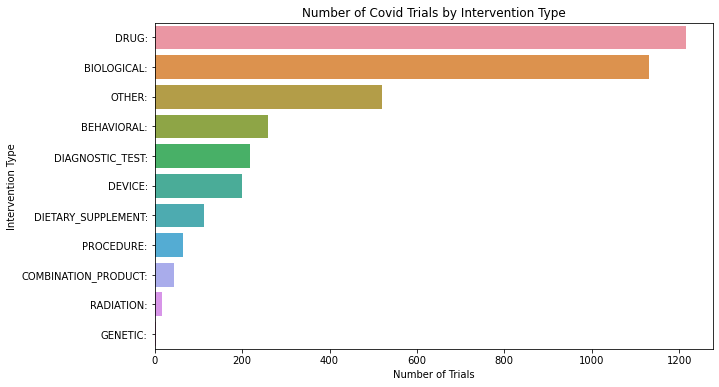

In [37]:
#Graph the covidInterventionDictType df on a bar plot
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Count', y = 'Intervention Type', data = covidInterventionsDictType)
plt.title('Number of Covid Trials by Intervention Type')
plt.xlabel('Number of Trials')
plt.ylabel('Intervention Type')
plt.show()


In [40]:
#For trials that have the type 'Other', what are the 10 most common interventions
covidInterventionsDictOther = covidInterventionsDict[covidInterventionsDict['Intervention Type'] == 'OTHER:']
covidInterventionsDictOther = covidInterventionsDictOther.sort_values(by = 'Count', ascending = False)
covidInterventionsDictOther.head(10)


,Intervention,Count,Intervention Type,Intervention Name,Target
1,OTHER: Placebo,157,OTHER:,Placebo,Covid
585,OTHER: Standard of Care,13,OTHER:,Standard,Covid
378,OTHER: Standard of care,12,OTHER:,Standard,Covid
358,OTHER: placebo,6,OTHER:,placebo,Covid
1679,OTHER: Saline,5,OTHER:,Saline,Covid
878,OTHER: Exercise,5,OTHER:,Exercise,Covid
2412,OTHER: Normal saline (0.9% sodium chloride sol...,4,OTHER:,Normal,Covid
370,OTHER: Standard care,4,OTHER:,Standard,Covid
166,OTHER: Usual Care,3,OTHER:,Usual,Covid
782,OTHER: Normal saline,3,OTHER:,Normal,Covid


In [43]:
breastInterventionsDict

,Intervention,Count,Intervention Type,Intervention Name,Target
38,DRUG: Fulvestrant,81,DRUG:,Fulvestrant,Breast Cancer
62,OTHER: Questionnaire Administration,71,OTHER:,Questionnaire,Breast Cancer
29,DRUG: Paclitaxel,71,DRUG:,Paclitaxel,Breast Cancer
28,DRUG: Cyclophosphamide,68,DRUG:,Cyclophosphamide,Breast Cancer
111,DRUG: Trastuzumab,63,DRUG:,Trastuzumab,Breast Cancer
71,DRUG: Carboplatin,59,DRUG:,Carboplatin,Breast Cancer
75,DRUG: Pembrolizumab,59,DRUG:,Pembrolizumab,Breast Cancer
242,DRUG: Abemaciclib,53,DRUG:,Abemaciclib,Breast Cancer
21,DRUG: Capecitabine,51,DRUG:,Capecitabine,Breast Cancer
4,PROCEDURE: Biospecimen Collection,50,PROCEDURE:,Biospecimen,Breast Cancer


In [42]:
#Get the unique intervention types for the breast cancer interventionDict
breastInterventionTypes = list(breastInterventionsDict['Intervention Type'].unique())
#Count the number of trials for each type of intervention
breastInterventionsDictType = breastInterventionsDict['Intervention Type'].value_counts().reset_index()
breastInterventionsDictType.columns = ['Intervention Type', 'Count']
breastInterventionsDictType = breastInterventionsDictType.sort_values(by = 'Count', ascending = False)
breastInterventionsDictType

,Intervention Type,Count
0,DRUG:,41
1,OTHER:,6
2,PROCEDURE:,6
3,BIOLOGICAL:,2
4,RADIATION:,1


In [23]:
#Create a df that only contains the interventions where the type is 'Drug'
covidInterventionsDictDrug = covidInterventionsDict[covidInterventionsDict['Intervention Type'] == 'DRUG:']
#Drop placebo for intervention
covidInterventionsDictDrug = covidInterventionsDictDrug[~(covidInterventionsDictDrug['Intervention Name'] == 'Placebo')]
covidInterventionsDictDrug.head(20)


,Intervention,Count,Intervention Type,Intervention Name,Target
72,DRUG: Hydroxychloroquine,59,DRUG:,Hydroxychloroquine,Covid
387,DRUG: Ivermectin,26,DRUG:,Ivermectin,Covid
80,DRUG: Azithromycin,25,DRUG:,Azithromycin,Covid
38,DRUG: Remdesivir,22,DRUG:,Remdesivir,Covid
100,DRUG: Favipiravir,19,DRUG:,Favipiravir,Covid
109,DRUG: Tocilizumab,14,DRUG:,Tocilizumab,Covid
140,DRUG: Standard of care,14,DRUG:,Standard,Covid
148,DRUG: Enoxaparin,12,DRUG:,Enoxaparin,Covid
1229,DRUG: Methylprednisolone,12,DRUG:,Methylprednisolone,Covid
250,DRUG: Nitazoxanide,11,DRUG:,Nitazoxanide,Covid


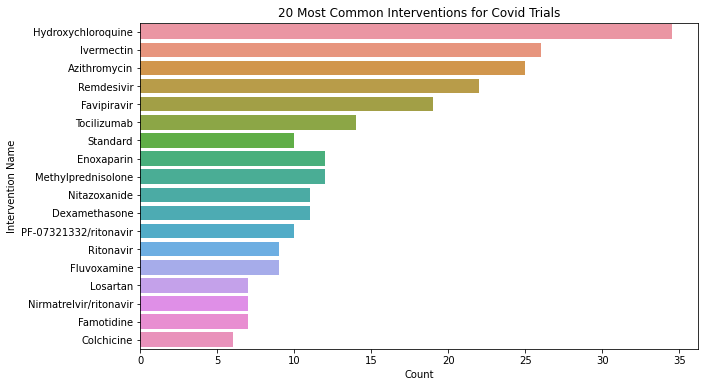

In [24]:
#First, a bar plot
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Count', y = 'Intervention Name', data = covidInterventionsDictDrug.head(20), ci=None)
plt.title('20 Most Common Interventions for Covid Trials')
plt.xlabel('Count')
plt.ylabel('Intervention Name')
plt.show()


In [34]:
#Join the two dataframes together and display on a bar graph, with the number of studies for breast cancer in pink, and covid in blue
interventionsDict = pd.concat([breastInterventionsDictDrug.head(20).reset_index(), covidInterventionsDictDrug.head(20).reset_index()])
interventionsDict = interventionsDict.drop(columns = 'index')
interventionsDict['Index'] = interventionsDict.index
interventionsDict
#increment all values of the Index column by 1
interventionsDict['Index'] = interventionsDict['Index'] + 1
interventionsDict.head()



,Intervention,Count,Intervention Type,Intervention Name,Target,Index
0,DRUG: Fulvestrant,81,DRUG:,Fulvestrant,Breast Cancer,1
1,DRUG: Paclitaxel,71,DRUG:,Paclitaxel,Breast Cancer,2
2,DRUG: Cyclophosphamide,68,DRUG:,Cyclophosphamide,Breast Cancer,3
3,DRUG: Trastuzumab,63,DRUG:,Trastuzumab,Breast Cancer,4
4,DRUG: Carboplatin,59,DRUG:,Carboplatin,Breast Cancer,5


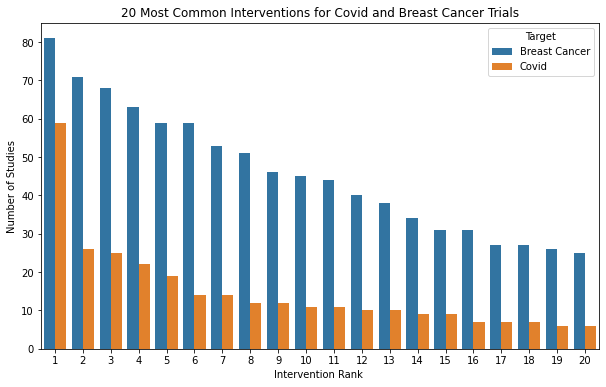

In [26]:
#Create a vertical bar plot that has two columns, dictated by the values of the 'Target' column. I do not want error bars. I would like the the highest value of covid to appear next to the highest value for breast cancer, and so on in a ranked manner
plt.figure(figsize=(10, 6))
sns.barplot(x='Index', y='Count', data=interventionsDict, hue='Target', ci=None)
plt.title('20 Most Common Interventions for Covid and Breast Cancer Trials')
plt.xlabel('Intervention Rank ')
plt.ylabel('Number of Studies')
plt.show()


In [27]:
#Now let's do some analysis about eligbility. The columns we are interested in are 'Age', 'Sex', 'Enrollment' in both the covid and breast cancer datasets.

covidDF['Conditions'] = "Covid"
breastDF['Conditions'] = "Breast Cancer"
#Combine the two datasets
combinedDF = pd.concat([covidDF, breastDF])
combinedDF.head()

,NCT Number,Status,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Start Date,Completion Date
0,NCT04446377,COMPLETED,Covid,DRUG: Apilimod Dimesylate Capsule|OTHER: Placebo,OrphAI Therapeutics,Yale University,ALL,"ADULT, OLDER_ADULT",PHASE2,142,INDUSTRY,INTERVENTIONAL,7/15/2020,4/19/2021
1,NCT05508477,RECRUITING,Covid,BIOLOGICAL: Vaksin Merah Putih - UA SARS-CoV-2...,Dr. Soetomo General Hospital,Indonesia-MoH|Universitas Airlangga|Biotis Pha...,ALL,"ADULT, OLDER_ADULT",PHASE3,4005,OTHER_GOV,INTERVENTIONAL,6/28/2022,5/28/2023
2,NCT04472494,TERMINATED,Covid,BIOLOGICAL: Abatacept|OTHER: Placebo,Bristol-Myers Squibb,NaN,ALL,"ADULT, OLDER_ADULT",PHASE2,61,INDUSTRY,INTERVENTIONAL,10/14/2020,9/13/2021
3,NCT04720794,COMPLETED,Covid,DEVICE: Lucira COVID-19 All-In-One test kit,Lucira Health Inc,NaN,ALL,"ADULT, OLDER_ADULT",NaN,101,INDUSTRY,INTERVENTIONAL,9/25/2020,10/20/2020
4,NCT04598594,COMPLETED,Covid,"DRUG: Patch, Nicotine|DRUG: Patch, Placebo",Assistance Publique - Hôpitaux de Paris,NaN,ALL,"ADULT, OLDER_ADULT",PHASE3,220,OTHER,INTERVENTIONAL,11/6/2020,6/20/2021


In [28]:
#Get the unique values for the age column
ageCategories = combinedDF['Age'].unique()


In [29]:
#For the values in ageCategories, count the number of studies that match each value and write to a dataframe that has category and count as the columns
ageCount = combinedDF['Age'].value_counts().reset_index()
ageCount.columns = ['Age', 'Count']
ageCount = ageCount.sort_values(by = 'Age')
#Reorder by the count of the count column
ageCount = ageCount.sort_values(by = 'Count', ascending = False)
ageCount

,Age,Count
0,"ADULT, OLDER_ADULT",4827
1,ADULT,384
2,"CHILD, ADULT, OLDER_ADULT",274
3,OLDER_ADULT,59
4,CHILD,43
5,"CHILD, ADULT",30


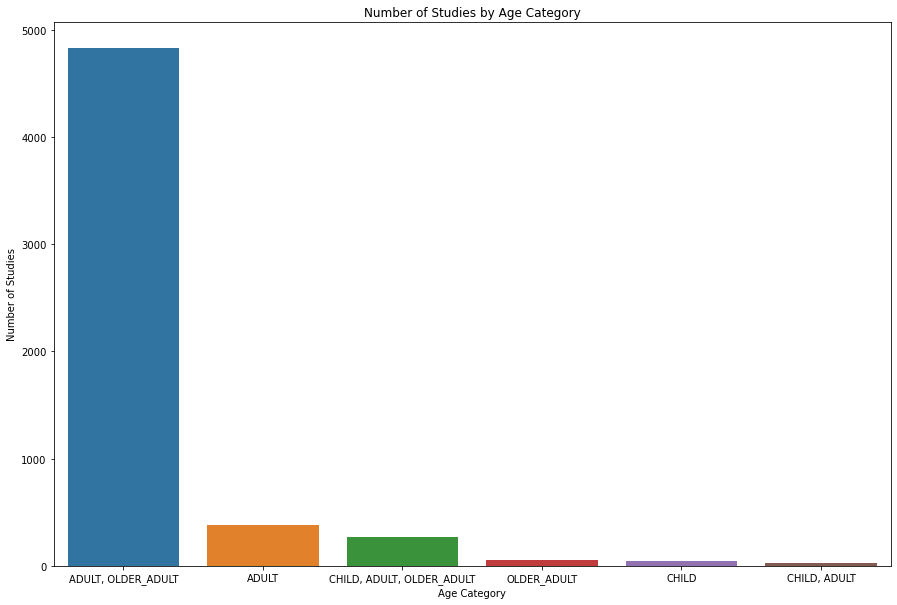

In [30]:
#Graph the enrollment by age categories as a bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Age', y='Count', data=ageCount)
plt.title('Number of Studies by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Studies')
plt.show()


In [31]:
#Get unique values for the sex column
sexCategories = combinedDF['Sex'].unique()
sexCategories

array(['ALL', 'MALE', 'FEMALE'], dtype=object)

In [32]:
#For the values in sexCategories, count the number of studies that match each value and write to a dataframe that has category and count as the columns
sexCount = combinedDF['Sex'].value_counts().reset_index()
sexCount.columns = ['Sex', 'Count']
sexCount = sexCount.sort_values(by = 'Sex')
#Reorder by the count of the count column
sexCount = sexCount.sort_values(by = 'Count', ascending = False)
sexCount

,Sex,Count
0,ALL,3920
1,FEMALE,1672
2,MALE,25
